# Sandbox 

Sandbox for main python scripts

# Generate tests

In [18]:
import sys
sys.path.append("..")
from pathlib import Path
import geopandas as gpd
import osmnx as ox

import networkx as nx
from morpho.layers import clean_gdf, get_graph, get_polygons

In [19]:
city = "Raleigh"

In [20]:
data_folder = Path("../../data")

In [21]:
def get_polygons(city):
    input_file = data_folder / "0_boundaries" / city / (city + ".gpkg")

    gdf = gpd.read_file(input_file, driver="GPKG")
    if len(gdf) > 200:
        raise ValueError(f"File too large: {len(gdf)} polygons.")

    # Force gdf projection
    gdf = ox.project_gdf(gdf, to_crs="epsg:4326", to_latlong=False)

    # Create unique ID
    gdf = gdf.reset_index(drop=True)
    gdf["UID"] = gdf.index

    gdf["collapse"] = 0
    gdf_collapsed = gdf.dissolve(by="collapse")

    return gdf, gdf_collapsed

In [22]:
city = "Raleigh"
gdf, gdf_collapsed = get_polygons(city)
gdf = gdf.head()
gdf = clean_gdf(gdf)
print(gdf)

  STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC   
0      37      183  052704  37183052704  527.04  Census Tract 527.04  G5020  \
1      37      183  053724  37183053724  537.24  Census Tract 537.24  G5020   
2      37      183  051502  37183051502  515.02  Census Tract 515.02  G5020   
3      37      183  051102  37183051102  511.02  Census Tract 511.02  G5020   
4      37      183  052407  37183052407  524.07  Census Tract 524.07  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON   
0        S  2922352   30951  +35.8408976  -078.5922622  \
1        S  5862051   77679  +35.8979250  -078.7499213   
2        S  2675640       0  +35.8087069  -078.6831384   
3        S  1738787       0  +35.7819418  -078.6658270   
4        S  3592937   24403  +35.7846005  -078.7100677   

                                            geometry  UID  collapse   
0  MULTIPOLYGON (((-78.60592 35.83491, -78.60589 ...    0         0  \
1  MULTIPOLYGON (((-78.76784 35.89

In [23]:
def test_missing_lat():
    """Test that missing latitude is below 10%"""
    missing_lon = gdf["lat"].isna().sum()
    assert missing_lon / len(gdf) < 0.1


def test_missing_lon():
    """Test that missing longitude is below 10%"""
    missing_lon = gdf["lon"].isna().sum()
    assert missing_lon / len(gdf) < 0.1

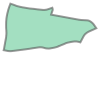

In [30]:
gdf['geometry'][0]

In [32]:
# def test_get_graph():
polygon = gdf["geometry"][0]
G = get_graph(polygon)

In [34]:
len(G)

179

In [36]:
len(G.nodes)

179

In [24]:
test_get_graph

<function __main__.test_get_graph()>

In [25]:
polygon

NameError: name 'polygon' is not defined